## Question 1

Train a Perceptron. Perceptron is a fundamental building block of a neural Network. Implement the perceptron training rule and get the appropriate parameters for a single perceptron for the given data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

In [2]:
data = pd.read_csv('NN_Input.csv')

data.insert(0,'x0',1)
data.head(5)

,x0,x1,x2,class
0,1,2,3,0
1,1,4,5,0
2,1,11,11,1
3,1,4,11,1
4,1,12,5,0


In [3]:
X =data.iloc[:,0:3].values
y =data.iloc[:,3].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
def model_fit(X,y):
    weight = np.zeros(X.shape[1])
    iterations = 200
    eta = 0.01
    threshold = 0
    for _ in range(iterations):
        for xi, target in zip(X,y):
            weight_sum = np.dot(np.transpose(xi),weight)
            predicton = np.where(weight_sum >= threshold ,1 ,0)
            update = eta * (target - predicton)
            weight += update * xi
            bias = weight[0]
    return weight

In [6]:
def predict(X,weight):
    prediction= []
    threshold = 0
    for xi in X:
        weight_sum = np.dot(np.transpose(xi),weight)
        prediction.append(np.where(weight_sum >= threshold ,1 ,0))
    return prediction

In [7]:
def plot_data(inputs,targets,weights):
    plt.figure(figsize=(10,6))
    for input,target in zip(inputs,targets):
        plt.plot(input[1],input[2],'go-' if (target == 1.0) else 'ro')
    for i in np.linspace(np.amin(inputs[:,:2]),np.amax(inputs[:,:2])):
        slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
        intercept = -weights[0]/weights[2]       
        y = (slope*i) + intercept
        plt.plot(i, y,'ko')

In [8]:
X_test

array([[ 1,  4,  5],
       [ 1,  6,  1],
       [ 1,  2, 10],
       [ 1,  4,  7]])

In [9]:
weight = model_fit(X_train,y_train)
y_pred = predict(X_test,weight)
y_pred

[array(1), array(0), array(1), array(1)]

In [10]:
weight

array([-0.64, -0.43,  0.49])

### Plot the data points and Obtained Decision Boundary

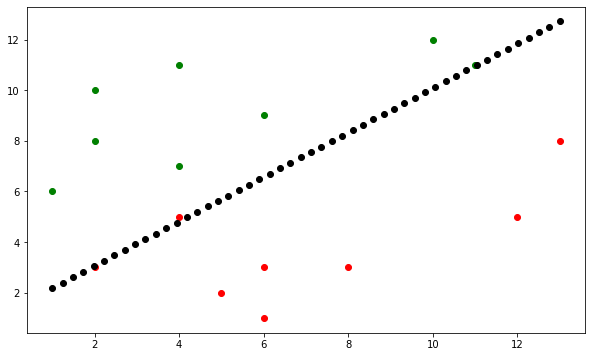

In [11]:
plot_data(X,y,weight) 

In [12]:
print('Accuracy :',accuracy_score(y_test,y_pred))

Accuracy : 0.75
